In [21]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import ipywidgets as widgets
from IPython import display
import matplotlib.pyplot as plt

In [22]:
table=pd.read_csv('Titanic.csv')

In [23]:
#Rellenando las edades con la media del resto de edades
mediana = table.Age.median()
tableCompleteData = table.fillna(value=mediana)
#tableCompleteData

In [38]:
#Número de sobrevivientes
numberOfSurvivors = 0
numberOfSurvivors = table.loc[tableCompleteData.Survived == 1]       
print('El número de sobrevivientes fue de:', len(numberOfSurvivors), 'personas')

El número de sobrevivientes fue de: 342 personas


In [37]:
#Media de: edades, precio y ticketes
print('La media de edades es............:', tableCompleteData.Age.mean())
print('La media de precios de ticktes es:', tableCompleteData.Fare.mean())

La media de edades es............: 29.36158249158249
La media de precios de ticktes es: 32.204207968574636


In [41]:
#Mediana de: edades, precios y ticketes
print('La mediana de edades es.:',tableCompleteData.Age.median())
print('La mediana de precios es:', tableCompleteData.Fare.median())
#print('La mediana de tickets es:', tableCompleteData.Ticket.median())

La mediana de edades es.: 28.0
La mediana de precios es: 14.4542


In [48]:
#Moda de: edades, precios y tickets
print('La moda de las edades es:', tableCompleteData.Age.mode())
print('La moda de los precios es:', tableCompleteData.Fare.mode())
print('La moda de los ticktes es:', tableCompleteData.Ticket.mode())

La moda de las edades es: 0    28.0
dtype: float64
La moda de los precios es: 0    8.05
dtype: float64
La moda de los ticktes es: 0        1601
1      347082
2    CA. 2343
dtype: object


In [50]:
#Varianza de edades y precios
print('La varianza de las edades es:', tableCompleteData.Age.var())
print('La varianza de precios es...:', tableCompleteData.Fare.var())

La varianza de las edades es: 169.51249827942345
La varianza de precios es...: 2469.436845743116


In [58]:
#Número de hombres y mujeres
print('El numero de mujeres que abordaron el titanic fue de:', len(tableCompleteData.loc[tableCompleteData.Sex == 'female']))
print('El numero de hombres que abordaron el titanic fue de:', len(tableCompleteData.loc[tableCompleteData.Sex == 'male']))

El numero de mujeres que abordaron el titanic fue de: 314
El numero de hombres que abordaron el titanic fue de: 577


In [65]:
#Que relación existe con los que murieron con respecto a la edad y clase social
survived = tableCompleteData.loc[tableCompleteData.Survived == 0]
survivedPclass1 = widgets.Output()
survivedPclass2 = widgets.Output()
survivedPclass3 = widgets.Output()
estrato1 = survived.loc[survived.Pclass == 1]
estrato2 = survived.loc[survived.Pclass == 2]
estrato3 = survived.loc[survived.Pclass == 3]
with survivedPclass1:
    display.display(estrato1[['Age','Pclass']])
with survivedPclass2:
    display.display(estrato2[['Age','Pclass']])
with survivedPclass3:
    display.display(estrato3[['Age','Pclass']])
tablas = widgets.HBox([survivedPclass1, survivedPclass2, survivedPclass3])

#tablas

In [85]:
#Promedio de las edades según el estrato
pclass1 = tableCompleteData.loc[tableCompleteData.Survived == 0].loc[tableCompleteData.Pclass == 1]
pclass2 = tableCompleteData.loc[tableCompleteData.Survived == 0].loc[tableCompleteData.Pclass == 2]
pclass3 = tableCompleteData.loc[tableCompleteData.Survived == 0].loc[tableCompleteData.Pclass == 3]
print('El promedio de edades para la clase social 1 es:', pclass1.Age.mean())
print('El promedio de edades para la clase social 2 es:', pclass2.Age.mean())
print('El promedio de edades para la clase social 3 es:', pclass3.Age.mean())

El promedio de edades para la clase social 1 es: 40.55625
El promedio de edades para la clase social 2 es: 33.144329896907216
El promedio de edades para la clase social 3 es: 26.951612903225808


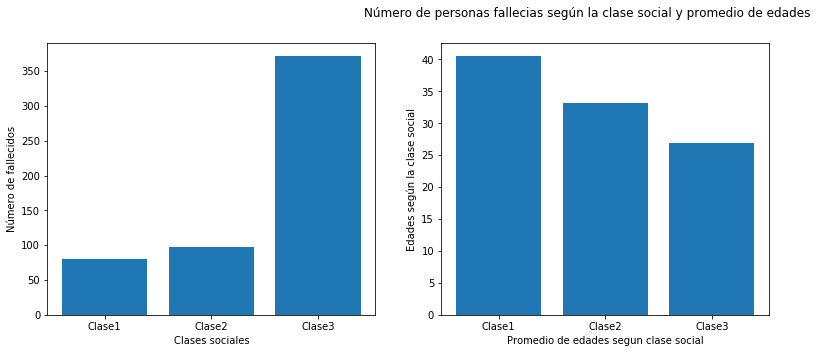

In [88]:
#Gráficos sobre las personas que murieron con respecto a la edad y clase social
#bar, scatter, plot
pclass = ['Clase1', 'Clase2', 'Clase3']
valuesPclass= [len(pclass1), len(pclass2), len(pclass3)]
averageAge = ['Clase1', 'Clase2', 'Clase3']
valuesAverageAge= [pclass1.Age.mean(), pclass2.Age.mean(), pclass3.Age.mean()]
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.bar(pclass, valuesPclass)
plt.ylabel('Número de fallecidos')
plt.xlabel('Clases sociales')
plt.subplot(132)
plt.bar(averageAge, valuesAverageAge)
plt.ylabel('Edades según la clase social')
plt.xlabel('Promedio de edades segun clase social')
plt.suptitle('Número de personas fallecias según la clase social y promedio de edades')
plt.show()